<a href="https://colab.research.google.com/github/Dhiooonn/Data-Mining/blob/main/Analisis_Dampak_Penggunaan_Media_Sosial_terhadap_Produktivitas_Kesehatan_Mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [8]:
# Menghubungkan Google Colab dengan Google Drive
# agar file yang tersimpan di Drive dapat diakses
from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset CSV dari folder Google Drive
# dan menyimpannya ke dalam DataFrame bernama df
df = pd.read_csv("/content/drive/MyDrive/Data Mining/Analisis-Dampak-Penggunaan-Media-Sosial-terhadap-Produktivitas-Kesehatan-Mental/dataset/social_media_vs_productivity.csv")

# Menampilkan 5 baris pertama dataset
# untuk melihat struktur dan isi data
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


Penjelasan:

**Identitas & Demografi**
*  `age` → usia responden
*  `gender` → jenis kelamin
*  `job_type` → jenis pekerjaan

**Penggunaan Media Sosial**
*   `daily_social_media_time` → waktu penggunaan media sosial per hari (jam)
*   `social_platform_preference` → platform yang paling sering digunakan
*   `number_of_notifications` → jumlah notifikasi per hari
*   `screen_time_before_sleep` → durasi layar sebelum tidur (jam)
*   `weekly_offline_hours` → jam tanpa internet per minggu

**Produktivitas**
*   `work_hours_per_day` → jam kerja per hari
*   `perceived_productivity_score` → produktivitas menurut persepsi diri
*   `actual_productivity_score` → produktivitas aktual
*   `breaks_during_work` → jumlah istirahat saat kerja
*   `job_satisfaction_score` → tingkat kepuasan kerja

**Kesehatan Mental & Gaya Hidup**
*   `stress_level` → tingkat stres
*   `sleep_hours` → jam tidur per hari
*   `days_feeling_burnout_per_month` → hari merasa burnout per bulan
*   `coffee_consumption_per_day` → konsumsi kopi per hari
*   `uses_focus_apps` → penggunaan aplikasi fokus (True/False)
*   `has_digital_wellbeing_enabled` → fitur digital wellbeing aktif atau tidak

# Data Understanding

In [10]:
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

,count,mean,std,min,25%,50%,75%,max
age,30000.0,41.486867,13.835221,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,27235.0,3.113418,2.074813,0.000000,1.639566,3.025913,4.368917,17.973256
number_of_notifications,30000.0,59.958767,7.723772,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,30000.0,6.990792,1.997736,0.000000,5.643771,6.990641,8.354725,12.000000
perceived_productivity_score,28386.0,5.510488,2.023470,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,5.514059,2.866344,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,27402.0,6.500247,1.464004,3.000000,5.493536,6.498340,7.504143,10.000000
screen_time_before_sleep,27789.0,1.025568,0.653355,0.000000,0.528490,1.006159,1.477221,3.000000
breaks_during_work,30000.0,4.992200,3.173737,0.000000,2.000000,5.000000,8.000000,10.000000


# Data Quality Check

In [12]:
# Missing Values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
daily_social_media_time,2765
job_satisfaction_score,2730
sleep_hours,2598
actual_productivity_score,2365
screen_time_before_sleep,2211
stress_level,1904
perceived_productivity_score,1614


In [13]:
# Duplikasi Data
df.duplicated().sum()

np.int64(0)

# Data Cleaning

In [15]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
  df[col] = df[col].fillna(df[col].median())

  df.isnull().sum()

# Exploratory Data Analysis

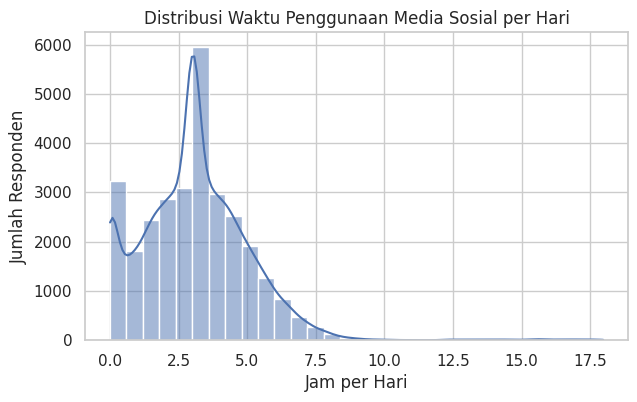

In [17]:
# Univariate Analysis
plt.figure(figsize=(7,4))
sns.histplot(df["daily_social_media_time"], bins=30, kde=True)
plt.title("Distribusi Waktu Penggunaan Media Sosial per Hari")
plt.xlabel("Jam per Hari")
plt.ylabel("Jumlah Responden")
plt.show()

Distribusi Stress Level

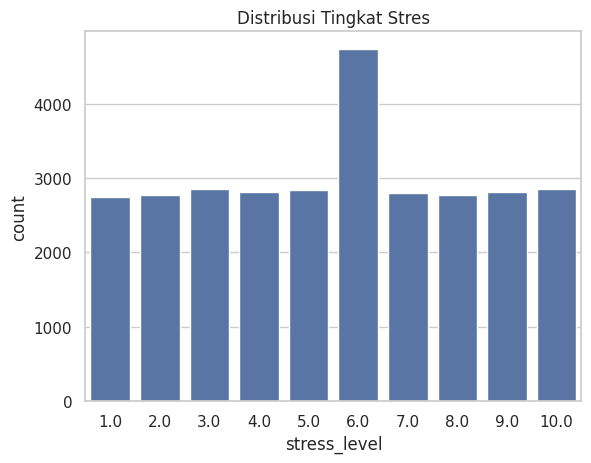

In [18]:
sns.countplot(x="stress_level", data=df)
plt.title("Distribusi Tingkat Stres")
plt.show()

Bivariate Analysis (Hubungan Dua Variabel)**bold text**

Media Sosial vs Produktivitas Aktual

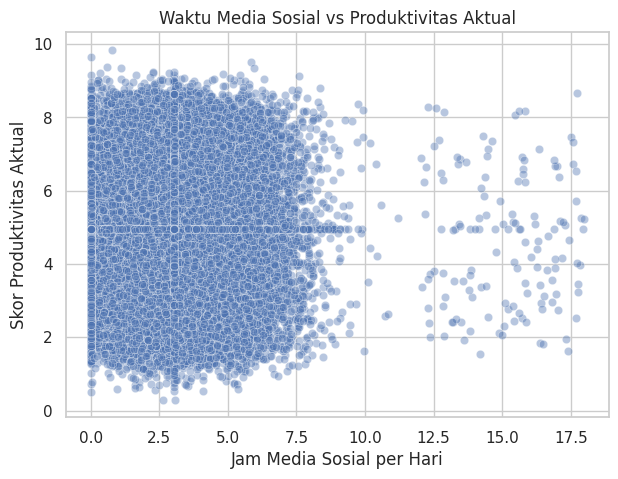

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="daily_social_media_time",
    y="actual_productivity_score",
    data=df,
    alpha=0.4
)
plt.title("Waktu Media Sosial vs Produktivitas Aktual")
plt.xlabel("Jam Media Sosial per Hari")
plt.ylabel("Skor Produktivitas Aktual")
plt.show()

In [20]:
df["daily_social_media_time"].corr(df["actual_productivity_score"])

np.float64(-0.010071597934998192)

Media Sosial vs Stres

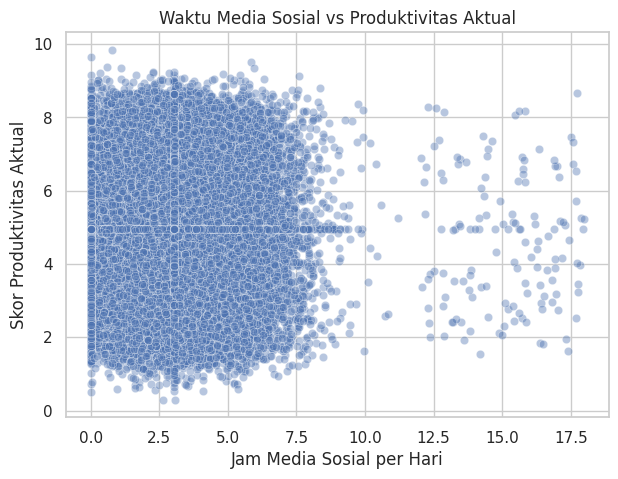

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="daily_social_media_time",
    y="actual_productivity_score",
    data=df,
    alpha=0.4
)
plt.title("Waktu Media Sosial vs Produktivitas Aktual")
plt.xlabel("Jam Media Sosial per Hari")
plt.ylabel("Skor Produktivitas Aktual")
plt.show()


# Feature Engineering (Supaya Insight Lebih Tajam)

**Kelompok Intensitas Penggunaan Media Sosial**

In [23]:
bins = [0, 1, 3, 6, 24]
labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

df["usage_group"] = pd.cut(
    df["daily_social_media_time"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df["usage_group"].value_counts()

,count
usage_group,
Tinggi,14600
Sedang,9082
Rendah,4399
Sangat Tinggi,1919


**Produktivitas per Kelompok Penggunaan**

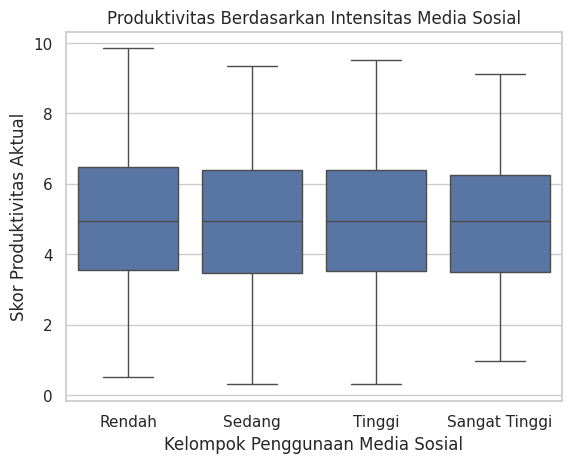

In [24]:
sns.boxplot(
    x="usage_group",
    y="actual_productivity_score",
    data=df
)
plt.title("Produktivitas Berdasarkan Intensitas Media Sosial")
plt.xlabel("Kelompok Penggunaan Media Sosial")
plt.ylabel("Skor Produktivitas Aktual")
plt.show()

**Stres per Kelompok Penggunaan**

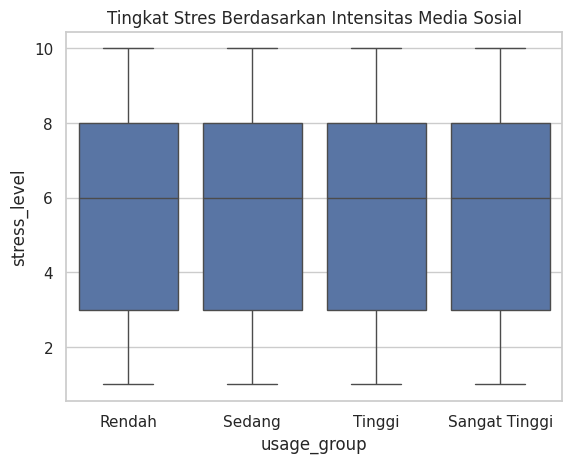

In [25]:
sns.boxplot(
    x="usage_group",
    y="stress_level",
    data=df
)
plt.title("Tingkat Stres Berdasarkan Intensitas Media Sosial")
plt.show()

**Korelasi Variabel Numerik**

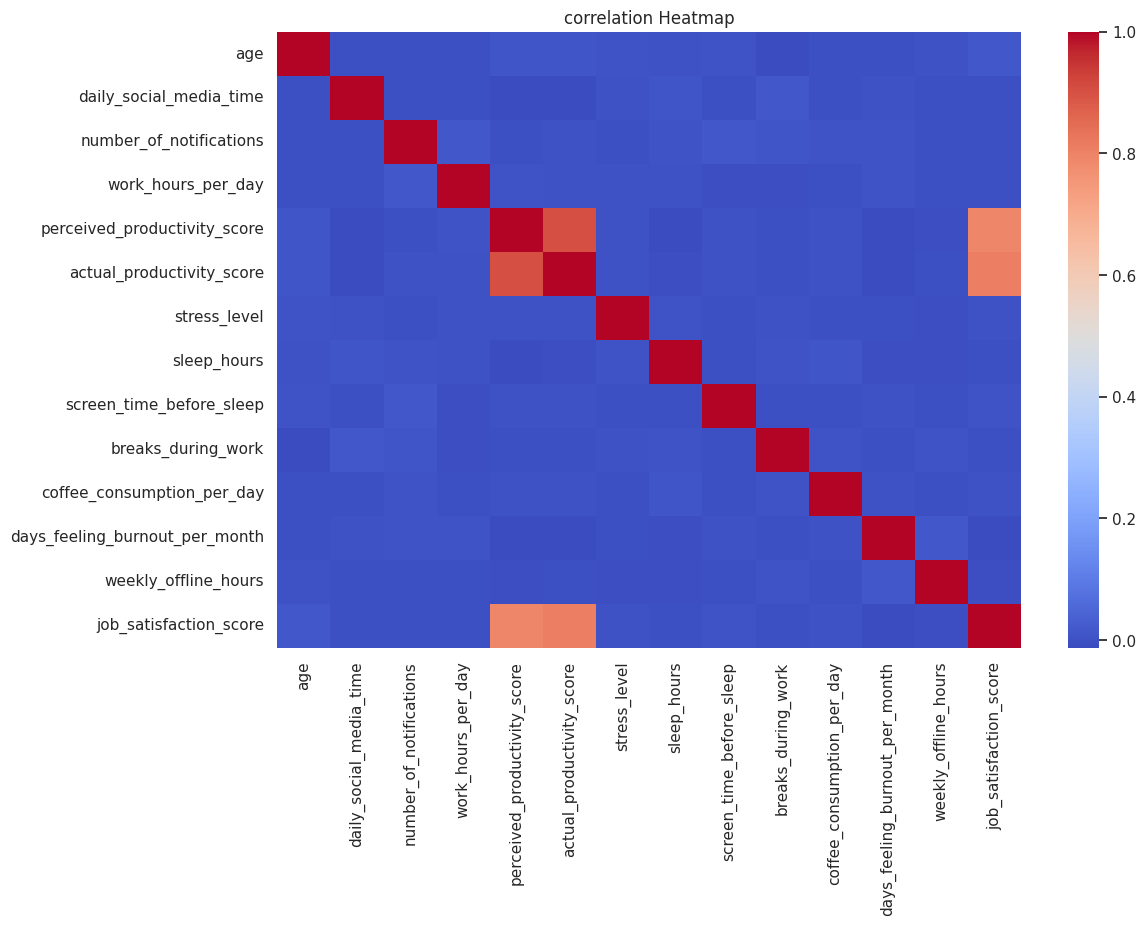

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_cols].corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("correlation Heatmap")
plt.show()